# PRCP-1025-FlightPricePrediction

### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

## Tasks:
 - Task 1: Prepare a complete data analysis report on the given data.
 - Task 2: Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.
 - Task 3: Create a report stating the performance of multiple models on this data and suggest the best model for production.
 - Task 4: Create a report which should include challenges you faced on data and what technique used with proper reason.

### Attribute Information :
1. <span style = "color: Black; font-weight:Bold">Airline:</span> So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2. <span style = "color: Black; font-weight:Bold">Date_of_Journey:</span> This column will let us know about the date on which the passenger’s journey will start.
3. <span style = "color: Black; font-weight:Bold">Source:</span> This column holds the name of the place from where the passenger’s journey will start.
4. <span style = "color: Black; font-weight:Bold">Destination:</span> This column holds the name of the place to where passengers wanted to travel.
5. <span style = "color: Black; font-weight:Bold">Route:</span> Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
6. <span style = "color: Black; font-weight:Bold">Arrival_Time:</span> Arrival time is when the passenger will reach his/her destination.
7. <span style = "color: Black; font-weight:Bold">Duration:</span> Duration is the whole period that a flight will take to complete its journey from source to destination.
8. <span style = "color: Black; font-weight:Bold">Total_Stops:</span> This will let us know in how many places flights will stop there for the flight in the whole journey.
9. <span style = "color: Black; font-weight:Bold">Additional_Info:</span> In this column, we will get information about food, kind of food, and other amenities.
10. <span style = "color: Black; font-weight:Bold">Price:</span> Price of the flight for a complete journey including all the expenses before onboarding.

### Loading the Libs:

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt

import warnings as wr
wr.filterwarnings('ignore')

import pickle
import sweetviz as sv

In [8]:
df = pd.read_excel('Flight_Fare.xlsx')

#  Load the Data and Initial Exploration

1. Head
2. Tail
3. Info

In [9]:
df.head(3) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [10]:
df.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Handling Missing Values

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
df.isnull().sum() / len(df) * 100 #As null values are below 5% we can drop it

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [15]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [18]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


# Checking for outliers 


<Axes: xlabel='Price'>

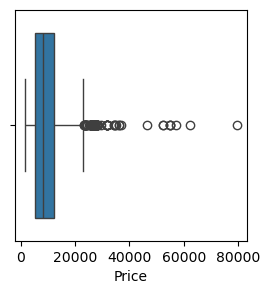

In [19]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df, x= 'Price')

#### Since we have one outlier which is far away from other data points that we should remove the last one

In [20]:
sorted(df.Price, reverse=True)

[79512,
 62427,
 57209,
 54826,
 54826,
 54826,
 52285,
 52229,
 46490,
 36983,
 36235,
 36235,
 35185,
 34608,
 34503,
 34273,
 31945,
 31825,
 31825,
 31825,
 31825,
 31825,
 31825,
 31783,
 29528,
 28322,
 28097,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27430,
 27282,
 27210,
 27210,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26743,
 26480,
 26092,
 25913,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25703,
 25430,
 25430,
 25139,
 24528,
 24318,
 24210,
 24115,
 24017,
 23843,
 23677,
 23583,
 23533,
 23528,
 23267,
 23170,
 23001,
 22950,
 22798,
 22794,
 22619,
 22294,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22153,
 22096,
 22096,
 21954,
 21934,
 21934,
 21829,
 21829,
 21730,
 21730,
 21571,
 21520,


In [21]:
df.drop(df[df['Price'] == 79512].index, inplace = True)
# We have removed the outlier which is far away from other data point

<Axes: xlabel='Price'>

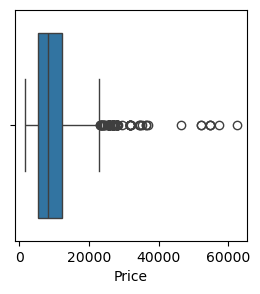

In [22]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df, x= 'Price')

# We have successfully removed the outlier

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.3+ KB


### As the columns Date_of_Journey, Dep_Time, Arrival_Time, Duration are in object dtype we should convert them into Datetime

### Why to extract date, month as a separate column?

- Machine learning models can interpret separate day, month columns more effectively than a single combined date column. This separation helps models understand the categorical or ordinal relationships that exist within temporal data, making predictions potentially more accurate.

In [24]:
df['Journey_date'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.month
df.drop(['Date_of_Journey'], axis= 1, inplace = True)

### Why to extract hour, minute as a separate column?
- Machine learning models can interpret separate hour, minute columns more effectively than a single combined date column. This separation helps models understand the categorical or ordinal remlationships that exist within temporal data, making predictions potentially more accurate.

In [25]:
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop(['Dep_Time'], axis = True, inplace = True)

In [26]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [27]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [28]:
df['Duration_hours'] = df['Duration'].str.extract(r'(\d+)h',expand=False).fillna(0).astype(int)

In [29]:
df['Duration_minute'] = df['Duration'].str.extract(r'(\d+)m', expand=False).fillna(0).astype(int)

In [30]:
df.drop(['Duration'],axis=1, inplace=True)

In [31]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


# EDA - Exploratory Data Analysis
- Exploratory Data Analysis (EDA) is like getting to know your data by looking at it and making simple charts and graphs. It helps you see patterns, find mistakes, and understand what the data can tell you before you start doing more complicated analysis.




1.  <span style = "color: black; font-weight:bold">Univariate analysis</span>

           
2.  <span style = "color: black; font-weight:bold">Bi variate analysis</span>

           
3.  <span style = "color: black; font-weight:bold">Multivariate analysis</span>
  
          


# Univariate Analysis
Univariate analysis involves  <span style = "color: Red; font-weight:bold">analyzing a single column or feature</span>. The type of analysis depends on whether the column is categorical or numerical.
- analysing a single column

### Numerical Columns:
- <span style = "color: black; font-weight:bold">Summary Statistics: </span> Mean, median, standard deviation, etc.
- <span style = "color: black; font-weight:bold">Histogram: </span>  To visualize the distribution.
- <span style = "color: black; font-weight:bold">Box plot: </span>  To identify outliers and visualize distribution.



### Categorical Columns:

- <span style = "color: black; font-weight:bold">Frequency Table: </span>To count the occurrences of each category.
- <span style = "color: black; font-weight:bold">Bar plot: </span>  To visualize the count of each category.
- <span style = "color: black; font-weight:bold">Count plot: </span> To show the frequency or count of each category.


# Bivariate Analysis
Bivariate analysis involves  <span style = "color: Red; font-weight:bold">analyzing the relationship between two columns or features</span>. The type of columns involved determines the appropriate methods:

 - analysing 2 column / 2 features
### Numerical vs. Numerical:

- <span style = "color: black; font-weight:bold">Scatter plot: </span>  To visualize the relationship.
- <span style = "color: black; font-weight:bold">Correlation: </span> To measure the strength of the relationship.
- <span style = "color: black; font-weight:bold">Line plot: </span>If one variable is time-based.
### Numerical vs. Categorical:

- <span style = "color: black; font-weight:bold">Box plot: </span>To compare the distribution of the numerical variable across different categories.
- <span style = "color: black; font-weight:bold">Violin plot: </span> Similar to box plots but with a density estimate.
- <span style = "color: black; font-weight:bold">Bar plot: </span>To show the mean or sum of the numerical variable for each category.
### Categorical vs. Categorical:

- <span style = "color: black; font-weight:bold">Heatmap: </span> To visualize the contingency table.
- <span style = "color: black; font-weight:bold">Clustered Bar Plots: </span> To compare the frequencies of combinations.

# Multivariate Analysis
Multivariate analysis involves  <span style = "color: red; font-weight:bold">analyzing more than two columns simultaneously</span>. This can get complex depending on the number of columns and their types.

- analysing all the columns at once  

### Mixed Types (Numerical and Categorical):

- <span style = "color: black; font-weight:bold">Pair plot: </span>  To visualize pairwise relationships.
- <span style = "color: black; font-weight:bold">Heatmap: </span> To show correlations between numerical variables.
- <span style = "color: black; font-weight:bold">PCA (Principal Component Analysis): </span> To reduce dimensionality and visualize high-dimensional data.
Numerical Columns:

- <span style = "color: black; font-weight:bold">Correlation Matrix: </span> To visualize the correlation between all numerical columns.


# Univariate Analysis
- analyzing a single column or feature.

## Sweet Viz
- Sweetviz is a Python library that generates beautiful, high-density visualizations to quickly analyze and compare datasets. 

In [32]:
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [33]:
# Show the report in the browser
report.show_html("Flight_Fare_Report.html")


Report Flight_Fare_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Univariate Analysis
- analyzing a single column or feature.

### Numerical Columns:
- Price col
- Histogram: To visualize the distribution.

In [29]:
df.describe()

,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minute
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,9080.621103,13.510252,4.708735,12.491714,24.407359,13.349405,24.690572,10.245389,28.325531
std,4561.134008,8.478896,1.164345,5.748632,18.767622,6.859601,16.507581,8.495162,16.946233
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,62427.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<Axes: xlabel='Price', ylabel='Count'>

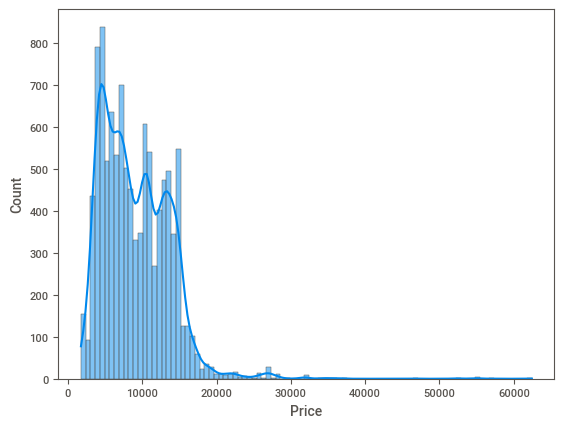

In [30]:
sns.histplot(data = df, x='Price', kde = True)

### Categorical Columns:
- Airline,Source,destination,Route, Tota_stops, Additional_info
- Bar plot, Count plot

In [31]:
df.describe(include = 'object')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10681,10681,10681,10681,10681,10681
unique,12,5,6,128,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3849,4536,4536,2376,5624,8344


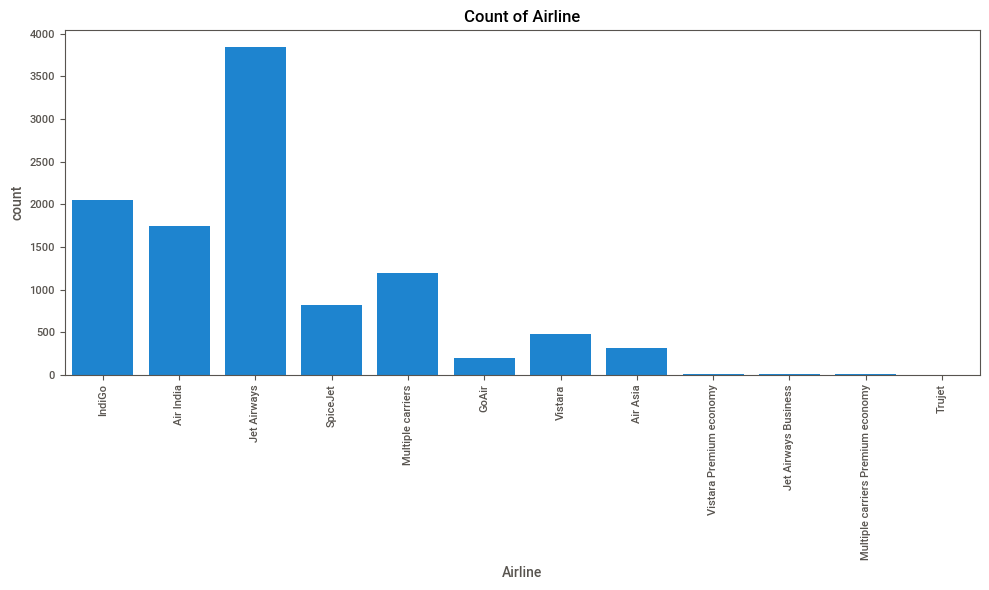

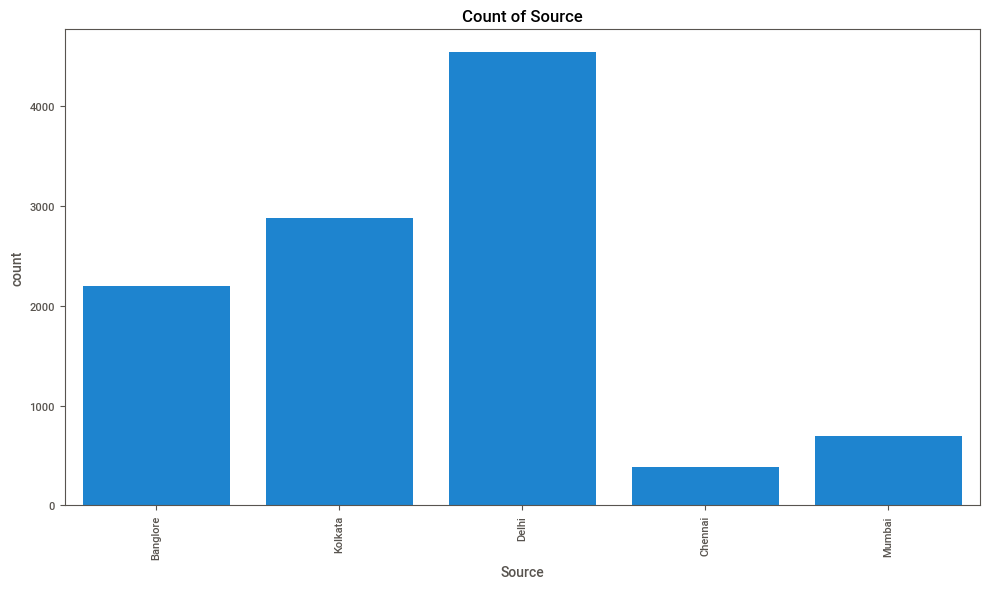

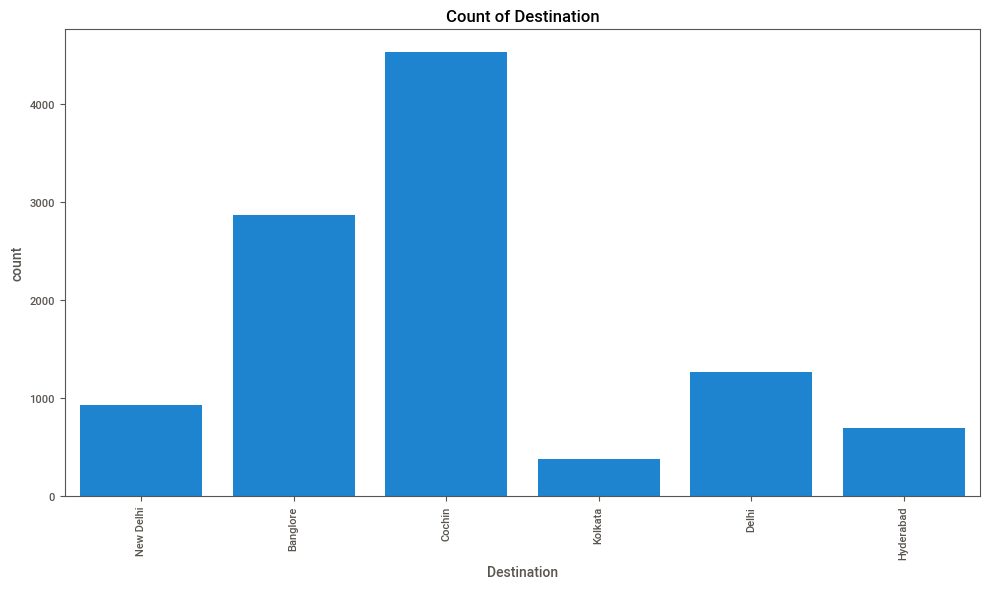

In [32]:
category_col = ['Airline','Source', 'Destination']
for cat in category_col:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=cat)
    plt.title(f'Count of {cat}')
    plt.xticks(rotation = 90)
    plt.tight_layout();

## Bi - Variate Analysis
- Numerical vs. Categorical:

### Airline vs Price

In [33]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

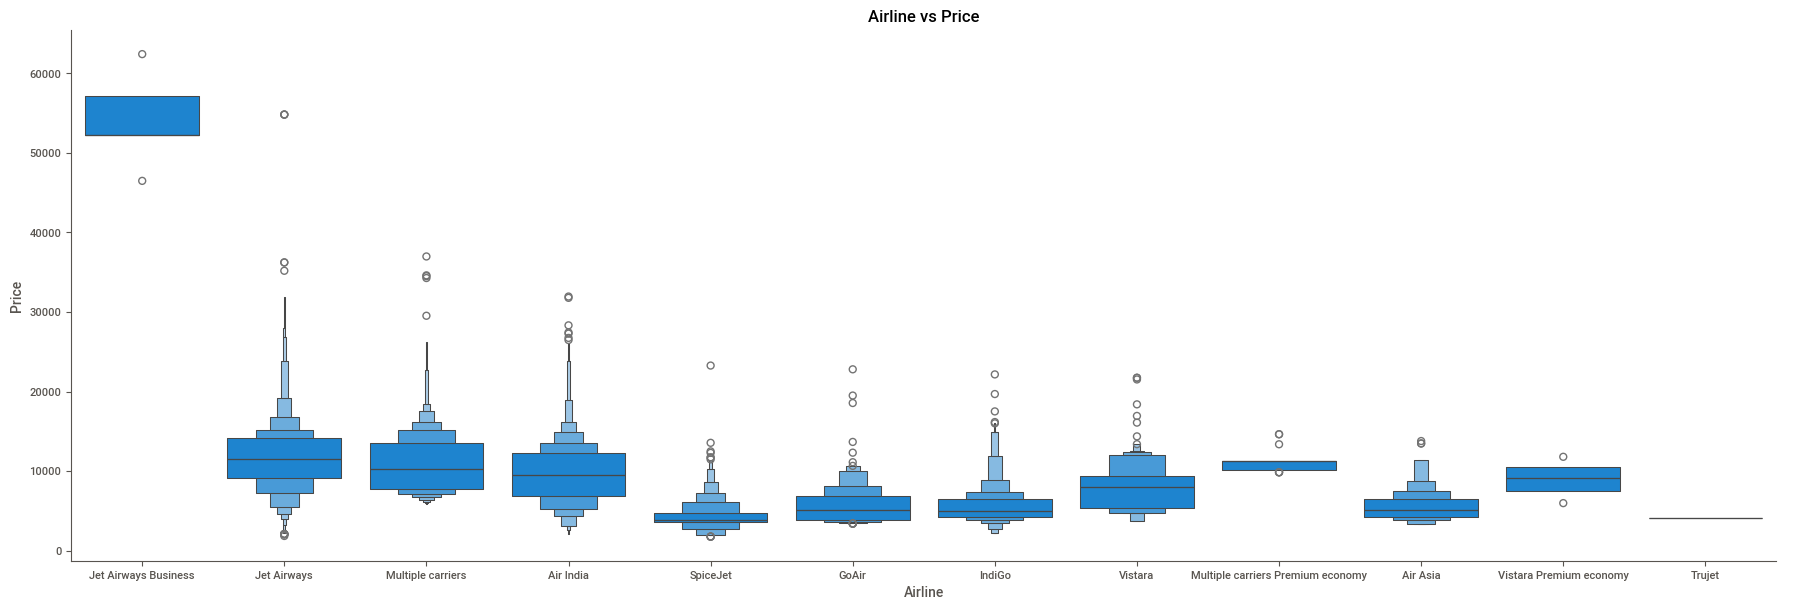

In [34]:
sns.catplot(x = 'Airline', y= 'Price', data=df.sort_values('Price', ascending=False), kind= 'boxen', height = 6, aspect=3)
plt.title("Airline vs Price")
plt.show()

## Source

In [35]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2196
Mumbai       697
Chennai      381
Name: count, dtype: int64

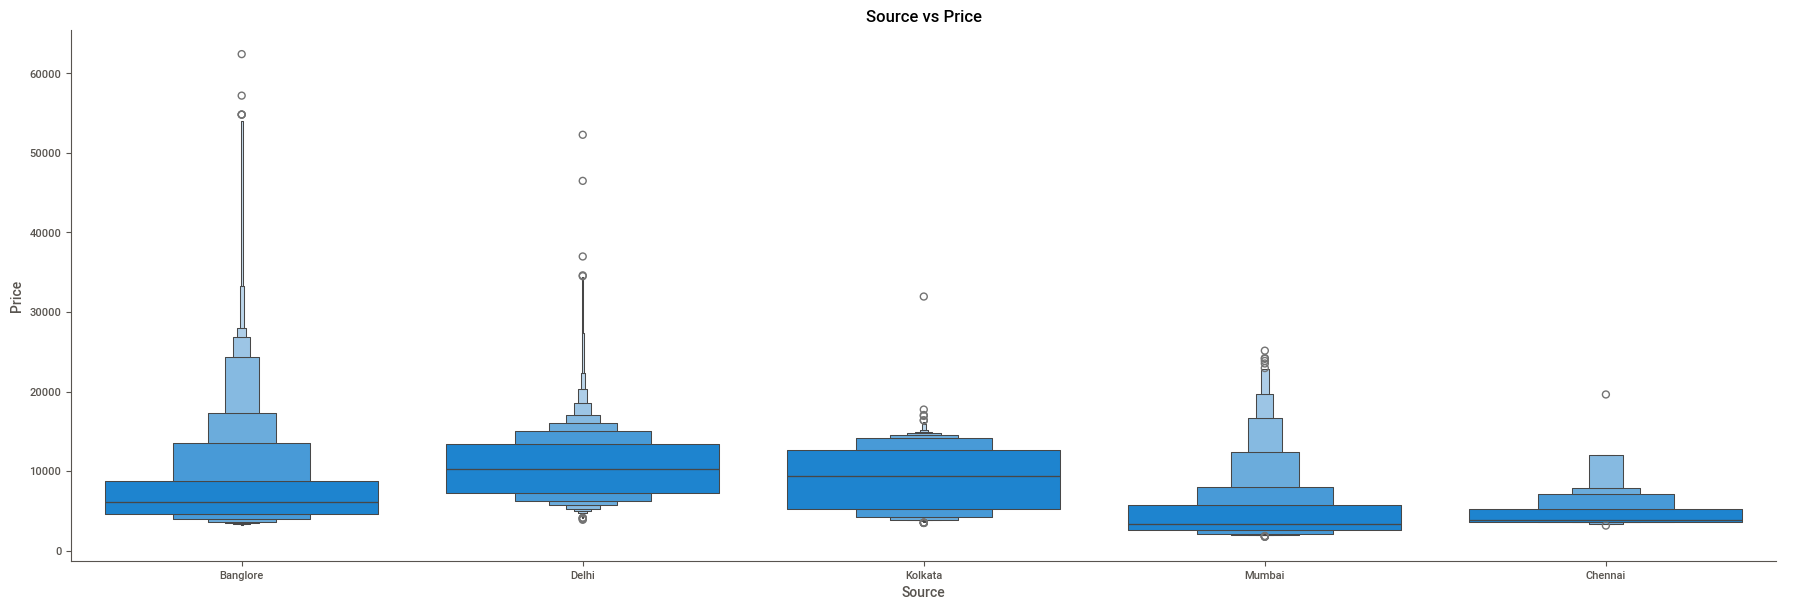

In [36]:
sns.catplot(x = 'Source', y= 'Price', data=df.sort_values('Price', ascending=False), kind = 'boxen', height= 6, aspect=3)
plt.title('Source vs Price')
plt.show()

## Destination


In [37]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     931
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

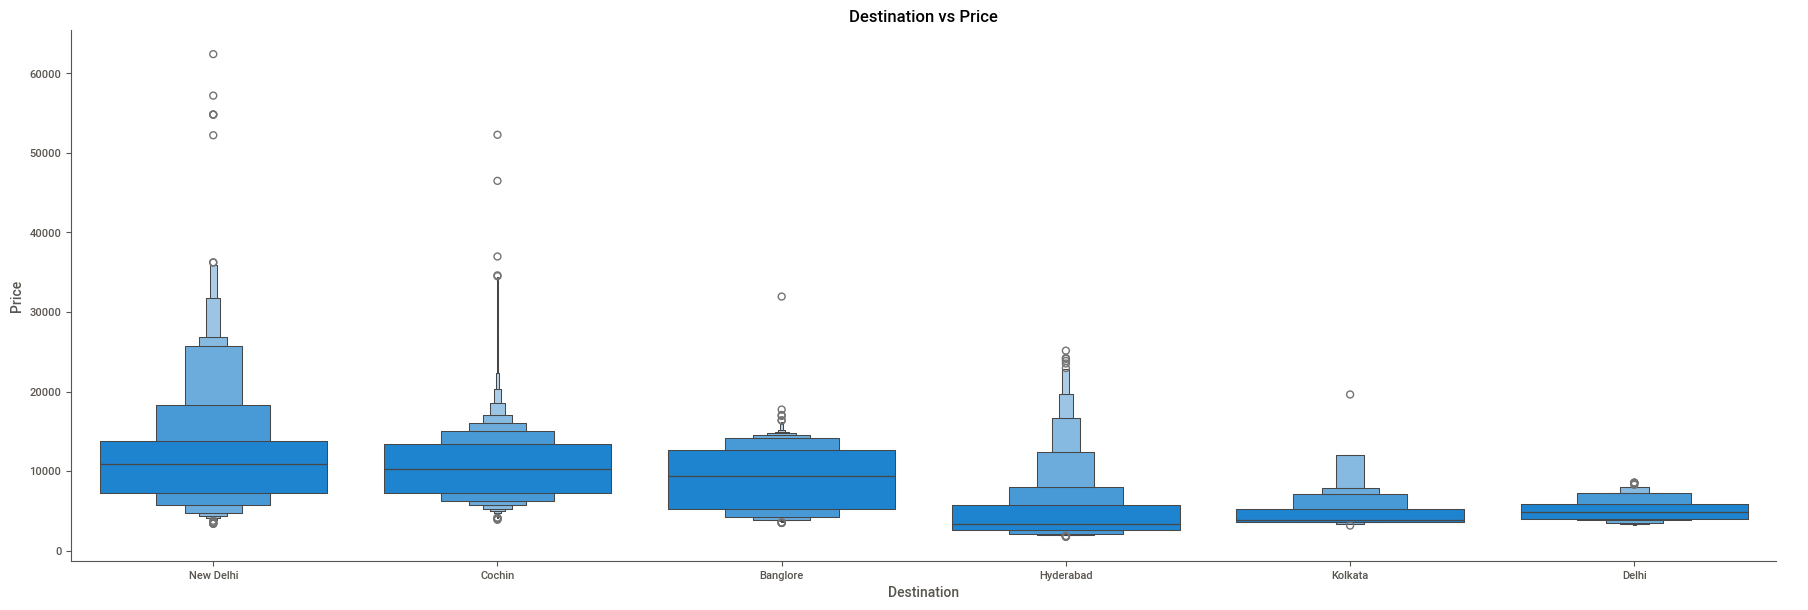

In [38]:
sns.catplot(x = 'Destination', y= 'Price', data=df.sort_values('Price', ascending=False), kind = 'boxen', height= 6, aspect=3)
plt.title("Destination vs Price")
plt.show()

 # Total Stops vs Price

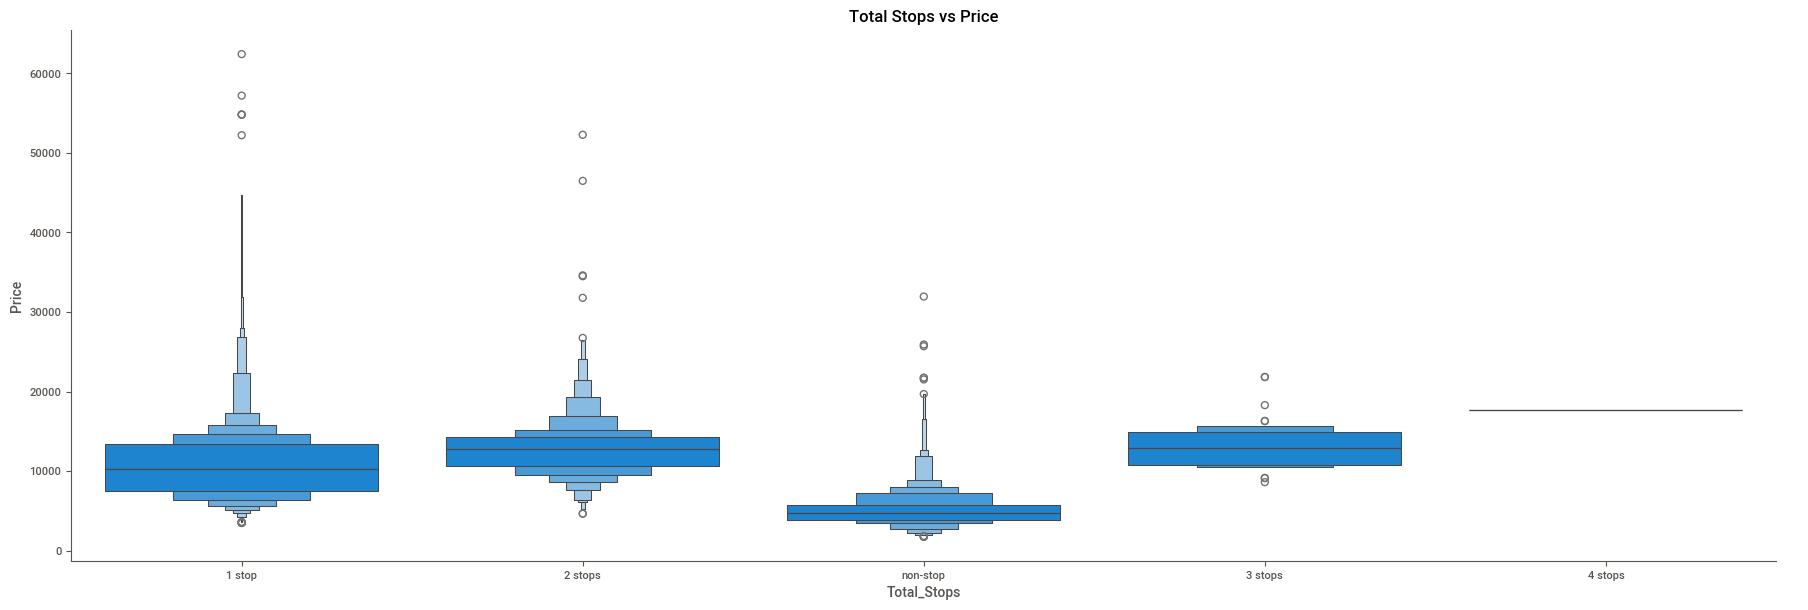

In [39]:
sns.catplot(x = 'Total_Stops', y= 'Price', data=df.sort_values('Price', ascending=False), kind = 'boxen', height= 6, aspect=3)
plt.title("Total Stops vs Price")
plt.show()

### As Route column and Total stops column are giving same information we can drop either

In [40]:
df["Additional_Info"].value_counts() #As this column giving no info we are dropping it

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [41]:
df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [43]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

# Encoding

1. <span style = "color: blue; font-weight: bold; font-size: 120%;">Nominal data</span> = Data are not in any order = we use <span style="color: green; font-weight: bold; font-size: 120%;">OneHotEncoder</span>
 in this case
 
2. <span style= "color: Blue; font-weight: Bold; font-size: 120%;">Ordinal Data</span> = Data are in order = we use <span style = "color:Green; font-weight:Bold; font-size: 120%">LabelEncoder</span> in this case

3. Categorical columns in our dataset = Airline, Source, Destination, Route, Total_stops, Additional_Info

In [44]:
# As Airline coulmn has Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(df['Airline'], drop_first=True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [45]:
# As Source coulmn has Nominal Categorical data we will perform OneHotEncoding

Source = pd.get_dummies(df['Source'], drop_first=True,prefix= "Source")

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [46]:
# As Destination coulmn has Nominal Categorical data we will perform OneHotEncoding

Destination = pd.get_dummies(df['Destination'], drop_first=True,prefix="Destination")

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [47]:
# In our dataset the price increases with increase in stops so we are choosing LabelEncoder

df.replace({'non-stop':0, '1 stop':1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [48]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [49]:
df.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

<span style = "color:black; font-weight:bold">-----------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

## Defining Features and Target


In [50]:
# Dropping multiple columns from df
X = df.drop(['Price','Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minute'], axis=1)
y = df['Price']


## Splitting the Data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
- To find out the best feature which will contribute and have good relation with target variable.
- Feature selection methods:
1. <span style =  "color: Green; font-weight: Bold; font-size: 120%" >Heatmap</span>
2. <span style =  "color: Green; font-weight: Bold; font-size: 120%" >Feature_Importance_</span>


# Cor-relation

<Axes: >

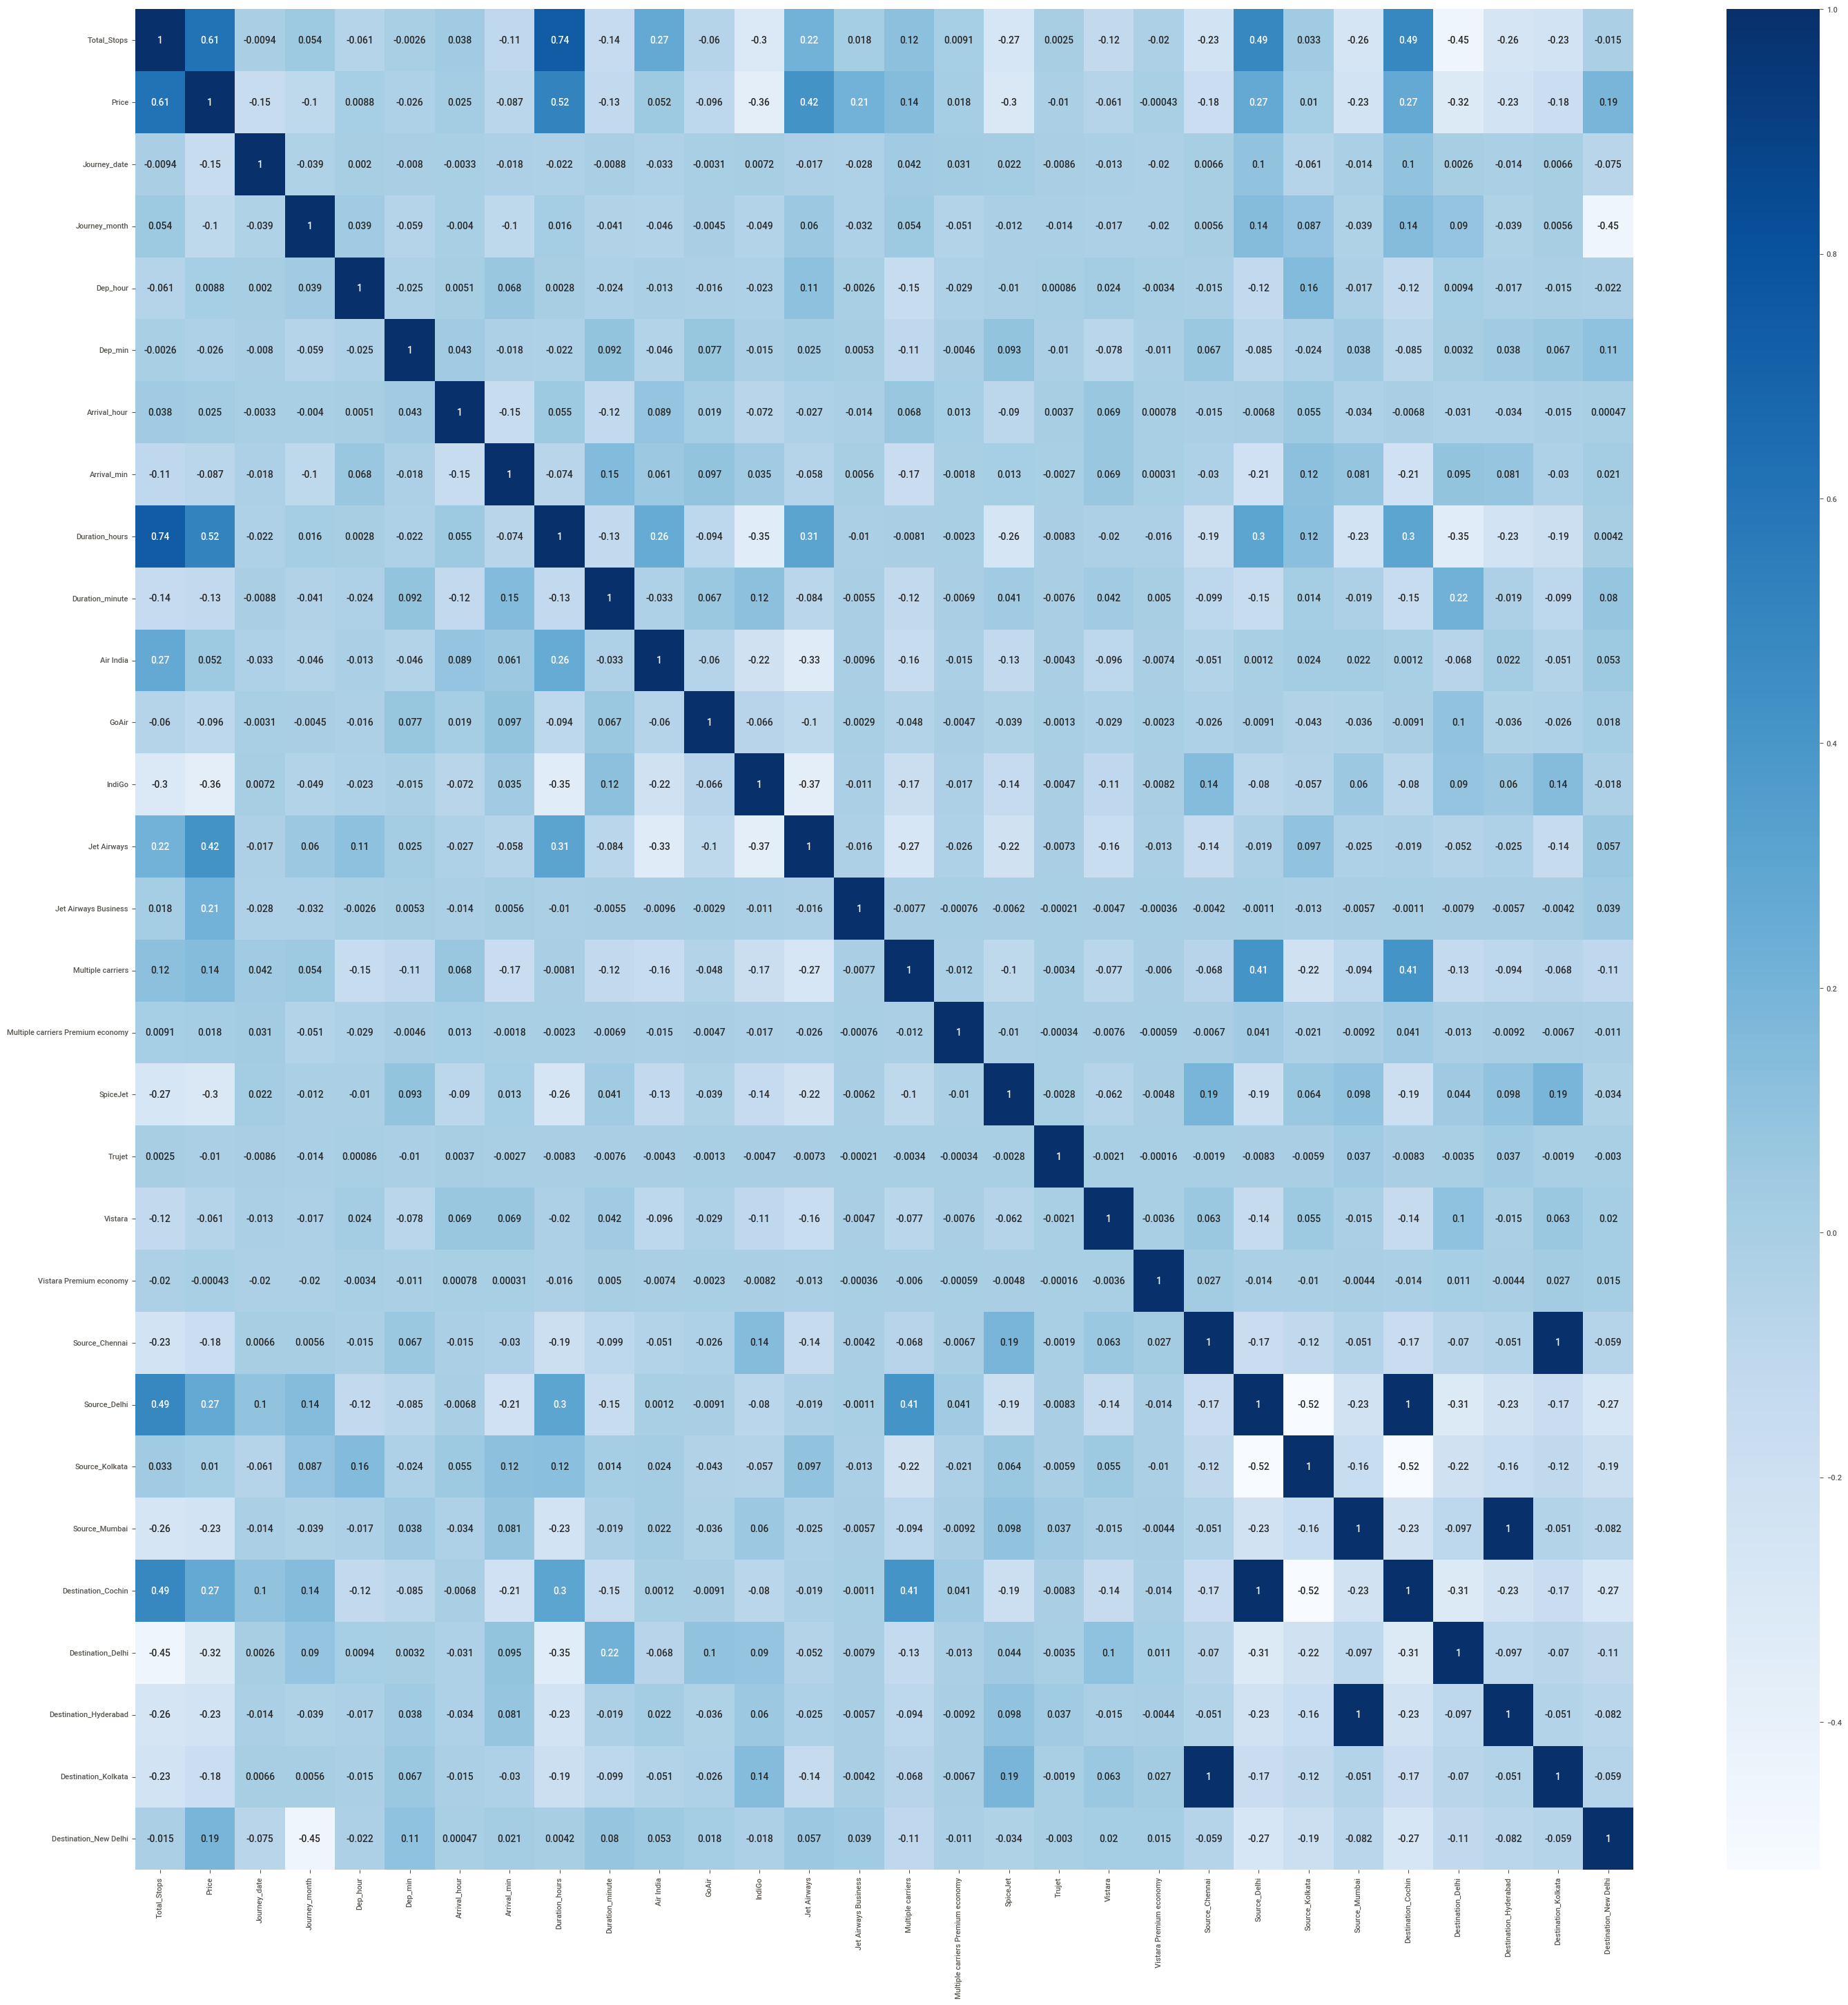

In [52]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [53]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[3.01642024e-01 1.51013434e-01 6.07970188e-02 5.34099864e-02
 3.76447864e-02 1.92230333e-02 1.64664535e-03 1.85051899e-02
 1.68040772e-01 4.96553737e-02 2.09943551e-02 1.06093894e-03
 2.94296813e-03 1.86989177e-04 7.35369102e-03 1.46246149e-04
 7.07079126e-04 1.90405026e-02 3.11882278e-03 8.70841141e-03
 1.26012768e-02 2.45242413e-02 9.84264590e-03 7.57621900e-04
 2.64359463e-02]


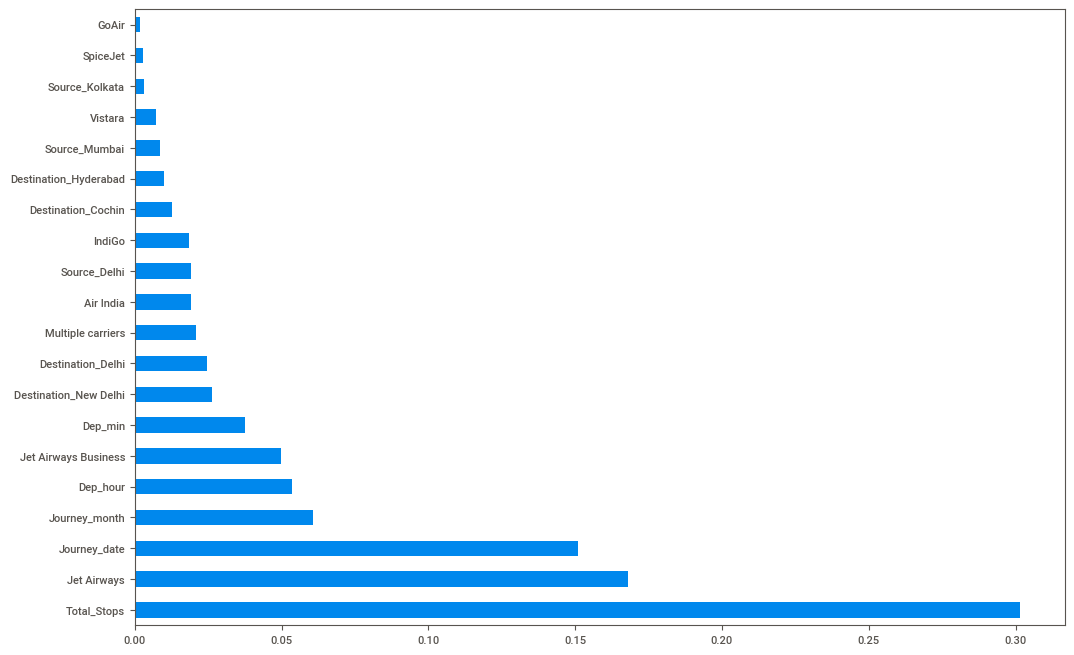

In [55]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Random forest regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
y_pred = reg_rf.predict(X_test)

In [62]:
from sklearn import metrics

In [81]:
print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



R2_score: 0.8322607772118549
MAE: 1191.5716914963837
MSE: 3705368.998766133
RMSE: 1924.9335050245588


# Hyper-Parameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Creating Random Grid for RandomForestRegressor
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [67]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid, scoring='r2', n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [69]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [83]:
prediction = rf_random.predict(X_test)

In [84]:
print('R2_score:', metrics.r2_score(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


R2_score: 0.8415786739326163
MAE: 1219.1063274477156
MSE: 3499536.1287377537
RMSE: 1870.7047144693236


In [115]:
y_prediction

array([10366.63618246,  6001.03033369,  9256.10348382, ...,
        7936.80671456, 11992.78737069, 12583.40971056])

# GradientBoostingRegressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [87]:
y_pred2 = gb.predict(X_test)

In [88]:
print('R2_score:', metrics.r2_score(y_test, y_pred2))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))



R2_score: 0.7757476048893928
MAE: 1558.4805330936563
MSE: 4953748.198722573
RMSE: 2225.701731751713


# Hyper parameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


In [91]:
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)


In [92]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2', verbose=1)

In [93]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [95]:
prediction2 = grid_search.predict(X_test)

In [96]:
print('R2_score:', metrics.r2_score(y_test, prediction2))
print('MAE:', metrics.mean_absolute_error(y_test, prediction2))
print('MSE:', metrics.mean_squared_error(y_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))


R2_score: 0.8397320593369341
MAE: 1311.869290617133
MSE: 3540327.950482105
RMSE: 1881.5759220616385


# XGB Regressor

In [97]:
from xgboost import XGBRegressor

In [98]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
y_pred3 = xgb.predict(X_test)

In [100]:
print('R2_score:', metrics.r2_score(y_test, y_pred3))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))



R2_score: 0.8529852629325742
MAE: 1190.0948662264748
MSE: 3247563.9271287583
RMSE: 1802.0998660253983


In [106]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200]
}


In [107]:
grid_search2 = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='r2', cv=5, 
                           verbose=2, n_jobs=-1)

In [108]:
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [119]:
grid_search2.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1.0}

In [109]:
prediction3 = grid_search2.predict(X_test)

In [111]:
print('R2_score:', metrics.r2_score(y_test, prediction3))
print('MAE:', metrics.mean_absolute_error(y_test, prediction3))
print('MSE:', metrics.mean_squared_error(y_test, prediction3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction3)))



R2_score: 0.8555816178006308
MAE: 1188.1717765211893
MSE: 3190210.300004569
RMSE: 1786.115981677721


# Comparing R_2 scores

In [113]:
rfg_score1 =  metrics.r2_score(y_test, prediction)
gbr_score2 =  metrics.r2_score(y_test, prediction2)
xgbr_score3 =  metrics.r2_score(y_test, prediction3)

In [114]:
print(rfg_score1,gbr_score2,xgbr_score3)

0.8415786739326163 0.8397320593369341 0.8555816178006308


In [115]:
final_scores = pd.DataFrame({'Models' :['RFG','GBR','XGBR'],
             'R2_SCORE':[score1,score2,score3]})

In [116]:
final_scores

,Models,R2_SCORE
0,RFG,0.841579
1,GBR,0.839732
2,XGBR,0.855582


<Axes: xlabel='Models', ylabel='R2_SCORE'>

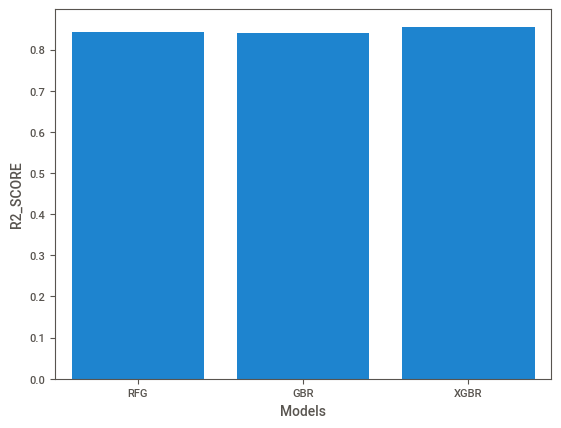

In [117]:
sns.barplot(x=final_scores['Models'], y=final_scores['R2_SCORE'])

# Save the model to reuse it again

In [120]:
# Saving the Model
xgbr_final = grid_search2.best_estimator_
filename = 'flight_reg_xgbr.pkl'
pickle.dump(xgbr_final, open(filename, 'wb'))

# Loading and Testing the Saved Model
loaded_model = pickle.load(open('flight_reg_xgbr.pkl', 'rb'))
y_prediction = loaded_model.predict(X_test)


In [121]:
y_prediction

array([10298.809,  5630.694,  8856.207, ...,  6875.19 , 12164.923,
       14212.363], dtype=float32)